In [31]:
import pickle
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

In [32]:
unique_final_df = pd.read_pickle('unique_final_df.pkl')

unique_final_df.head()

,Tweets,Location,Cleaned_Tweet,Word_tokenized_tweets,fully_cleaned_tweet,sentiment,cluster_label,Updated_loc,frequency
12933,"We are supported by a great group of people, says Ange @JOY949CEO who has been working 50/50 from home &amp; studio. How do we keep inspiring people when we are not together? For her it's thrown h...","Melbourne, Victoria , Australia",we are supported by a great group of people says ange joy949ceo who has been working 5050 from home amp studio how do we keep inspiring people when we are not together for her its thrown her but s...,"[supported, great, group, people, ange, 949ceo, working, 5050, home, studio, keep, inspiring, people, together, thrown, shes, adjusted, daviddmacca, 1959, satmag]",we are supported by a great group of people says ange joy ceo who has been working from home amp studio how do we keep inspiring people when we are not together for her its thrown her but s...,1,0,Australia,1
3846,"@misguidedjenni At least they are getting a dose of Vitamin D out in the sun, although research is mixed on Vitamin D deficiency and #Covid19 https://t.co/pjMf0Xzx9J",Melbourne,misguidedjenni at least they are getting a dose of vitamin d out in the sun although research is mixed on vitamin d deficiency and,"[misguidedjenni, least, getting, dose, vitamin, although, research, mixed, vitamin, deficiency]",misguidedjenni at least they are getting a dose of vitamin d out in the sun although research is mixed on vitamin d deficiency and,-1,2,Australia,1
3844,"@michelpjdejong @thefattestbob @twitslvtblocker 2)\nThey have so totally isolated the #COVID19 virus!\nMany times, many places\n\nSee\nhttps://t.co/8Y8rGBhnO7\n&amp; here\nhttps://t.co/J1zZQAmMAd\...",Australia,michelpjdejong thefattestbob twitslvtblocker 2 they have so totally isolated the virus many times many places see amp here amp here amp here amp here amp sarscov2,"[michelpjdejong, thefattestbob, twitslvtblocker, totally, isolated, virus, many, time, many, place, sarscov]",michelpjdejong thefattestbob twitslvtblocker they have so totally isolated the virus many times many places see amp here amp here amp here amp here amp sarscov,1,0,Australia,1
408,#COVID19 Global Update 2020-05-30 06:51:54\n116304 new cases\n5904658 total cases\n2579629 recovered\n362010 deaths\nSource : HPB API,"Sydney, New South Wales",global update 20200530 065154 116304 new cases 5904658 total cases 2579629 recovered 362010 deaths source hpb api,"[global, update, 2020053, 0 065154 1163, case, 5904658, total, case, 2579629, recovered, 362010, death, source]",global update new cases total cases recovered deaths source hpb api,0,2,Australia,1
9406,New Zealand 🇳🇿 is down to just one active coronavirus case #COVID19 https://t.co/jzzXmMst3f,"Coonabarabran, New South Wales",new zealand is down to just one active coronavirus case,"[zealand, active, coronavirus, case]",new zealand is down to just one active coronavirus case,-1,2,Australia,1


In [33]:
unique_final_df['Updated_loc'].value_counts()

USA                  6942
Rest of the World    4859
India                1187
Canada                593
England               382
Australia             367
Name: Updated_loc, dtype: int64

In [34]:
location_df = pd.concat([unique_final_df['Updated_loc'],unique_final_df['Tweets']], axis = 1, ignore_index = True)

location_df.columns = ['Location', 'Tweets']

location_df.head()

,Location,Tweets
12933,Australia,"We are supported by a great group of people, says Ange @JOY949CEO who has been working 50/50 from home &amp; studio. How do we keep inspiring people when we are not together? For her it's thrown h..."
3846,Australia,"@misguidedjenni At least they are getting a dose of Vitamin D out in the sun, although research is mixed on Vitamin D deficiency and #Covid19 https://t.co/pjMf0Xzx9J"
3844,Australia,"@michelpjdejong @thefattestbob @twitslvtblocker 2)\nThey have so totally isolated the #COVID19 virus!\nMany times, many places\n\nSee\nhttps://t.co/8Y8rGBhnO7\n&amp; here\nhttps://t.co/J1zZQAmMAd\..."
408,Australia,#COVID19 Global Update 2020-05-30 06:51:54\n116304 new cases\n5904658 total cases\n2579629 recovered\n362010 deaths\nSource : HPB API
9406,Australia,New Zealand 🇳🇿 is down to just one active coronavirus case #COVID19 https://t.co/jzzXmMst3f


In [35]:
all_tweets_by_location = {i: location_df.loc[location_df[location_df['Location']== i].index, 'Tweets'].tolist() for i in location_df['Location'].value_counts().keys().tolist()}
                               

In [36]:
all_tweets_by_location.keys()

dict_keys(['USA', 'Rest of the World', 'India', 'Canada', 'England', 'Australia'])

In [37]:
transformed_df = pd.DataFrame(data = all_tweets_by_location.keys(), index = all_tweets_by_location.values())

transformed_df = transformed_df.reset_index()

transformed_df.columns = ['Tweets','Location']

transformed_df = transformed_df[sorted(transformed_df.columns)]

transformed_df['Tweets'] = transformed_df['Tweets'].apply(lambda x: str(''.join([i for i in x])))

transformed_df

,Location,Tweets
0,USA,"Serious question here. I'm not even remotely being critical of all the protests across the country because I support all the nonviolent protesters, but how is this going to impact the #COVID19 pan..."
1,Rest of the World,"Interesting essay on classic #sciencefiction novel, Earth Abides, and the #COVID19 #coronavirus #pandemic - although I think the author could be more critical of these very white post-apocalyptic ..."
2,India,"India case count crosses 1.7Lakh-mark, Death toll nears 4,971\nrecovery rate is 46.6%\nSpike in 24Hrs crosses to 7%\n\nConfirmed Cases:- 1,73,763\nDeaths:- 4,971\nCured:- 82,369\nActive Cases:- 86..."
3,Canada,Executive Administrator Jodi Coville and Vice President Jay Berberick practicing covid protocols! SANITIZE*MASK*SOCIAL DISTANCING*CLEAN* #COVID19 #protecteachother https://t.co/8gA2hrNNiXRead my r...
4,England,"Funniest thing of the day (which is just over an hour old:)\n\nI must have had some remote strain, some Bangladeshi one from some mountain #COVID19UK #SecondWave incoming. If numbers of cases, dea..."
5,Australia,"We are supported by a great group of people, says Ange @JOY949CEO who has been working 50/50 from home &amp; studio. How do we keep inspiring people when we are not together? For her it's thrown h..."


In [38]:
# Cleaning

import re
import string
import preprocessor as p
p.set_options(p.OPT.URL, p.OPT.EMOJI)

transformed_df['Cleaned_Tweets'] = transformed_df['Tweets'].replace('\.\.\.','', regex = True)
transformed_df['Cleaned_Tweets'] = transformed_df['Cleaned_Tweets'].apply(lambda x: p.clean(x))
transformed_df['Cleaned_Tweets'] = transformed_df['Cleaned_Tweets'].apply(lambda x: re.sub('@[\w]+:','', x))
transformed_df['Cleaned_Tweets'] = transformed_df['Cleaned_Tweets'].apply(lambda x: re.sub('RT|#COVID19|http|#Covid19|\\n|“|”|’|—|‘|@|:','', x))
transformed_df['Cleaned_Tweets'] = transformed_df['Cleaned_Tweets'].apply(lambda x: ''.join([w for w in x if w not in string.punctuation]))
transformed_df['Cleaned_Tweets'] = transformed_df['Cleaned_Tweets'].apply(lambda x: x.lower())
transformed_df['Cleaned_Tweets'] = transformed_df['Cleaned_Tweets'].replace('[\s\s]+', ' ', regex = True)
transformed_df['Cleaned_Tweets'] = transformed_df['Cleaned_Tweets'].replace(' following', 'following', regex = True)

In [41]:
pd.set_option('max_colwidth', 200)

transformed_df

,Location,Tweets,Cleaned_Tweets
0,USA,"Serious question here. I'm not even remotely being critical of all the protests across the country because I support all the nonviolent protesters, but how is this going to impact the #COVID19 pan...",serious question here im not even remotely being critical of all the protests across the country because i support all the nonviolent protesters but how is this going to impact the pandemic are we...
1,Rest of the World,"Interesting essay on classic #sciencefiction novel, Earth Abides, and the #COVID19 #coronavirus #pandemic - although I think the author could be more critical of these very white post-apocalyptic ...",interesting essay on classic sciencefiction novel earth abides and the coronavirus pandemic although i think the author could be more critical of these very white postapocalyptic recolonize americ...
2,India,"India case count crosses 1.7Lakh-mark, Death toll nears 4,971\nrecovery rate is 46.6%\nSpike in 24Hrs crosses to 7%\n\nConfirmed Cases:- 1,73,763\nDeaths:- 4,971\nCured:- 82,369\nActive Cases:- 86...",india case count crosses 17lakhmark death toll nears 4971 recovery rate is 466 spike in 24hrs crosses to 7 confirmed cases 173763 deaths 4971 cured 82369 active cases 86422 coronavirus coronavirus...
3,Canada,Executive Administrator Jodi Coville and Vice President Jay Berberick practicing covid protocols! SANITIZE*MASK*SOCIAL DISTANCING*CLEAN* #COVID19 #protecteachother https://t.co/8gA2hrNNiXRead my r...,executive administrator jodi coville and vice president jay berberick practicing covid protocols sanitizemasksocial distancingclean protecteachother my remarks from todays media briefing on tips f...
4,England,"Funniest thing of the day (which is just over an hour old:)\n\nI must have had some remote strain, some Bangladeshi one from some mountain #COVID19UK #SecondWave incoming. If numbers of cases, dea...",funniest thing of the day which is just over an hour old i must have had some remote strain some bangladeshi one from some mountain uk secondwave incoming if numbers of cases deaths and hospital a...
5,Australia,"We are supported by a great group of people, says Ange @JOY949CEO who has been working 50/50 from home &amp; studio. How do we keep inspiring people when we are not together? For her it's thrown h...",we are supported by a great group of people says ange joy949ceo who has been working 5050 from home amp studio how do we keep inspiring people when we are not together for her its thrown her but s...


In [55]:

from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords

stop_words = stopwords.words('english')

add_stop_words =  ["coronavirus","shapps","grant","Canada","Ontario","india","australia","amp","coronaviru","covid","covid19", "dont", "head", "cases"]

stop_words = text.ENGLISH_STOP_WORDS.union(add_stop_words)

tfidf = TfidfVectorizer(ngram_range = (3,3),stop_words = stop_words, max_features = 500)

data_tfidf = tfidf.fit_transform(transformed_df['Cleaned_Tweets'])

df_vectorized = pd.DataFrame(data_tfidf.toarray(), columns = tfidf.get_feature_names())

df_vectorized

,10 april 572,100000 thank destroying,100kdeadamericans rioting country,104542 americans died,1212 total recovered,13 worst affected,1500 cashapp apple,173763 active 86422,173763 including 86422,1819 active stand,...,world health organization,world total deaths,wuhan china coronavirusindia,wwg1wgaww ascension gcr,yall staywell stayhomewashhands,yay donald trump,year csr funds,youthwithyou2 astro happyyoonaday,youthwithyoufinale globallivefmxkristsingto tcas63,zelle drop tags
0,0.000000,0.059313,0.0000,0.000000,0.033363,0.000000,0.027359,0.007699,0.015399,0.006080,...,0.039493,0.059313,0.025949,0.000000,0.000000,0.048192,0.025949,0.074141,0.066727,0.030398
1,0.000000,0.000000,0.0603,0.054818,0.000000,0.008990,0.004495,0.007590,0.003795,0.000000,...,0.055968,0.000000,0.000000,0.087709,0.087709,0.000000,0.000000,0.000000,0.000000,0.004495
2,0.000000,0.000000,0.0000,0.000000,0.000000,0.043845,0.000000,0.092542,0.175831,0.027403,...,0.014834,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.035896,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.167102,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.010597,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.035798,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


## Top 10 words(4-gram)

In [56]:
df_vectorized = df_vectorized.transpose()
df_vectorized.columns = ['USA', 'Rest of the World', 'India',  'Canada', 'England','Australia']
df_vectorized.head()

,USA,Rest of the World,India,Canada,England,Australia
10 april 572,0.000000,0.000000,0.0,0.0,0.167102,0.0
100000 thank destroying,0.059313,0.000000,0.0,0.0,0.000000,0.0
100kdeadamericans rioting country,0.000000,0.060300,0.0,0.0,0.000000,0.0
104542 americans died,0.000000,0.054818,0.0,0.0,0.000000,0.0
1212 total recovered,0.033363,0.000000,0.0,0.0,0.000000,0.0


In [57]:
df_vectorized.to_pickle("df_vectorized.pkl")

In [58]:
top_10 = {}

for c in df_vectorized.columns:
    top = df_vectorized[c].sort_values(ascending = False).head(10)
    top_10[c] = list(zip(top.index, top.values))
    
    
for c, words in top_10.items():
    print(c,"\n")
    print(', '.join([word for word, count in words[0:9]]))
    print("*******************************************************************************************************************************")

USA 

bringing total confirmed, new deaths bringing, new deaths reported, deaths reported today, deaths bringing total, artpromotions coronavirusart music, art artists photography, artcall artistcall artistscall, artistcall artistscall artpromotions
*******************************************************************************************************************************
Rest of the World 

blog research usagainstalz, stress blog research, outbreak pandemic sars, read cdc mers, sars viraloutbreak virus, pandemic sars viraloutbreak, cdc mers outbreak, mers outbreak pandemic, caregivers feeling stressed
*******************************************************************************************************************************
India 

new 265 deaths, 265 deaths 24, spike 7964 new, 24 hours total, 7964 new 265, deaths 24 hours, 86422 active 82370, hours total number, cureddischargedmigrated 4971 deaths
*********************************************************************************

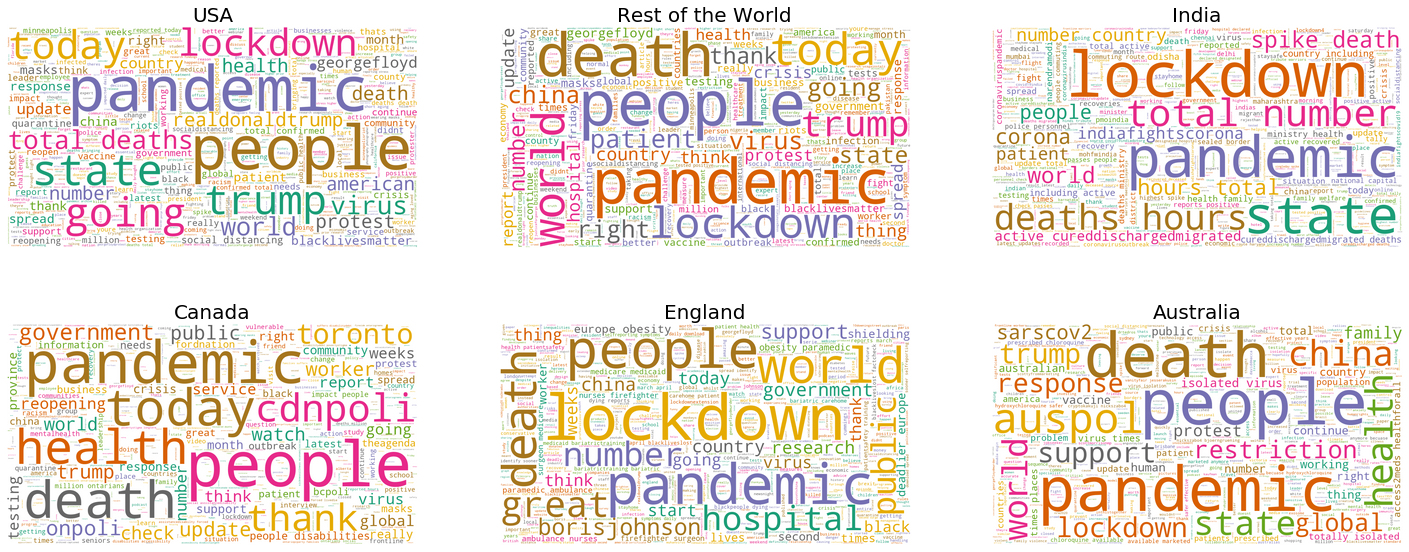

In [61]:
# Visualizing tweets using word cloud

from sklearn.feature_extraction import text 
from wordcloud import WordCloud
from nltk.corpus import stopwords
import matplotlib.pyplot as plt


wc = WordCloud(stopwords = stop_words, background_color = 'white', max_words = 600, min_word_length = 5, min_font_size = 4,
              colormap = 'Dark2', max_font_size = 200, random_state = 20, width = 1300, height =700)

plt.rcParams['figure.figsize'] = [25,10]

names = ['USA', 'Rest of the World', 'India',  'Canada', 'England','Australia']

for index in range(len(transformed_df)):
    
    if index < 7:
        
        wc.generate(transformed_df['Cleaned_Tweets'][index])
    
        plt.subplot(2, 3, index+1)
        plt.imshow(wc, interpolation = 'spline36')
        plt.axis('off')
        plt.title(names[index], fontsize = 20)
    
plt.show()

In [62]:
from textblob import TextBlob

transformed_df['Polarity'] = transformed_df['Cleaned_Tweets'].apply(lambda x: TextBlob(x).sentiment.polarity)
transformed_df['Subjectivity'] = transformed_df['Cleaned_Tweets'].apply(lambda x: TextBlob(x).sentiment.subjectivity)

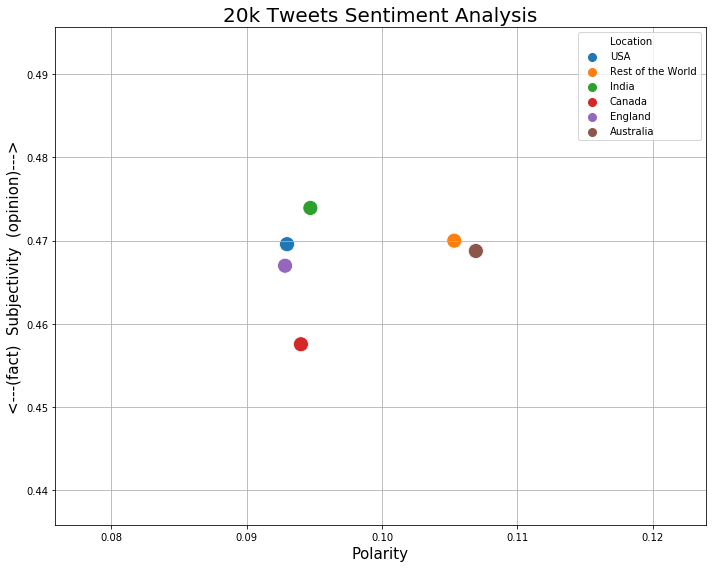

In [65]:
import seaborn as sns

plt.grid('darkgrid')
plt.rcParams['figure.figsize'] = [10,8]
#plt.rcParams['lines.markersize'] = 8


sns.scatterplot(x = transformed_df.Polarity, y=transformed_df.Subjectivity, 
                data = transformed_df, hue = transformed_df['Location'],s = 15**2)
    
plt.title('20k Tweets Sentiment Analysis', fontsize=20)
plt.xlabel('Polarity', fontsize=15)
plt.ylabel('<---(fact)  Subjectivity  (opinion)--->', fontsize=15)
#plt.xlim(-1, 1)
#plt.ylim(0,1)
plt.tight_layout()
plt.show()

## Insights:

* Tweets from USA and England proivdes similar kind of subjectivity with facts, unlike tweets from India are more opinionated than other countries.
* Canadian tweets also provides facts in terms of subjectivity.
* Though the polarity differece between all countries is minimal, Australia stands out with other countries in positive sentiment.

**Note that some of 'Australian tweets' is present in 'Rest of the World tweets'**